In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_dataset.csv')

In [6]:
df = df.dropna()

features = [
    'TotalMinutesAsleep', 
    'TotalSteps', 
    'Calories', 
    'SedentaryMinutes_x', 
    'VeryActiveMinutes_x', 
    'AverageHeartRate'
]
df = df[df['RiskCategory'] != 'High Risk']

X = df[features]
y = df['RiskCategory']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9818

Classification Report:
               precision    recall  f1-score   support

    Low Risk       0.98      1.00      0.99        50
 Medium Risk       1.00      0.80      0.89         5

    accuracy                           0.98        55
   macro avg       0.99      0.90      0.94        55
weighted avg       0.98      0.98      0.98        55



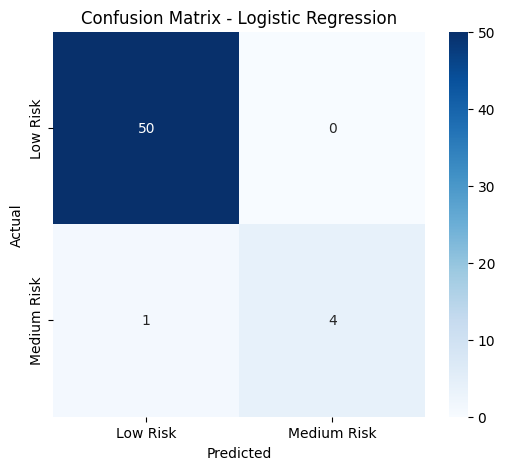

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Low Risk', 'Medium Risk'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Low Risk', 'Medium Risk'], 
            yticklabels=['Low Risk', 'Medium Risk'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()